Comparison between blending and simple moving average algorithms for filtering a series of numbers 

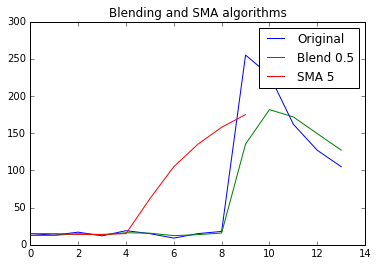

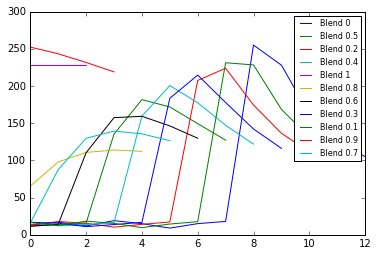

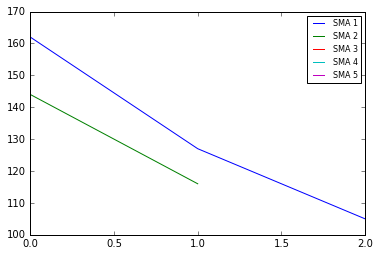

In [21]:
import matplotlib.pyplot as plt


def filter_blending(values, K):
    """Blending filter fn."""
    val = values.pop(0)
    blending_values = []
    for i, x in enumerate(values):
        val = K*val + (1-K)*x
        blending_values.append(val)
    return blending_values

def filter_sma(values, periods):
    """Simple moving average filter fn."""
    sma_values = []
    for i, x in enumerate(values):
        if len(values[i:periods+i]) == periods:
            val = sum(values[i:periods+i])/periods
            sma_values.append(val)
    return sma_values

def plot_comparison(values):
    """Plot 2 algorithms & original data."""
    K = 0.5
    blend = filter_blending(values, K)
    periods = 5
    sma = filter_sma(values, periods)
    plt.figure()
    plt.title("Blending and SMA algorithms")
    plt.plot(values, label="Original")
    plt.plot(blend, label="Blend "+str(K))
    plt.plot(sma, label="SMA "+str(periods))
    plt.legend()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close("all")

def plot_blendings(values):
    """Plot some blending results."""
    K_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    blend_dict = {}
    for K in K_list:
        blend_dict[K] = filter_blending(values, K)
    for key in blend_dict:
        plt.plot(blend_dict[key], label="Blend "+str(key))
    plt.legend(loc=1, prop={'size': 8})
    plt.show()
    plt.clf()
    plt.cla()
    plt.close("all")

def plot_smas(values):
    """Plot some SMA results."""
    p_list = [1, 2, 3, 4, 5]
    sma_dict = {}
    for periods in p_list:
        sma_dict[periods] = filter_sma(values, periods)
    for key in sma_dict:
        plt.plot(sma_dict[key], label="SMA "+str(key))
    plt.legend(loc=1, prop={'size': 8})
    plt.show()
    plt.clf()
    plt.cla()
    plt.close("all")

if __name__ == "__main__":
    """Comparison"""
    data = [10,15,13,17,12,19,15,9,15,18,255,228,162,127,105]

    plot_comparison(data)
    plot_blendings(data)
#     plot_smas(data)

